# Выявление топ-20 новостных материалов

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-топ-20-материалов" data-toc-modified-id="Анализ-топ-20-материалов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ топ-20 материалов</a></span></li><li><span><a href="#Визуализация-данных" data-toc-modified-id="Визуализация-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Визуализация данных</a></span></li></ul></div>

**Задача:** наглядно представить ТОП-20 метариалов по просмотрам за неделю.
- Оформить ТОП-20 в виде таблицы с заголовками материалов, при этом заголовок необходимо сделать активной ссылкой с возможностью перехода на статью на сайте (адрес страницы - столбец URL на листе База публикаций).
- Визуализировать полученные данные

**Ход работы:**
- Загрузка и изучение данных
- Предобработка данных
- Анализ топ-20 материалов
- Визуализация данных

## Загрузка данных

In [1]:
import pandas as pd

In [2]:
# Выгружаем базу публикаций
base_post = pd.read_csv('/Users/dasha/Downloads/База.csv')
base_post.info()
base_post.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID публикации        454 non-null    object
 1   Заголовок материала  454 non-null    object
 2   URL                  454 non-null    object
dtypes: object(3)
memory usage: 10.8+ KB


,ID публикации,Заголовок материала,URL
0,5bf52faf9a79477da426e81b,Как обанкротиться подешевле: прагматичные наст...,https://pro.rbc.ru/news/5bf52faf9a79477da426e81b
1,5c04ee439a7947b3fe48fe55,Имитация тунца: как искусственная рыба вытесня...,https://pro.rbc.ru/news/5c04ee439a7947b3fe48fe55
2,5c04f06c9a7947b48d48fe60,Сколько россияне тратят на путешествия,https://pro.rbc.ru/news/5c04f06c9a7947b48d48fe60
3,5c0695d69a79472e0096479e,Самые ходовые: какие специалисты в строительст...,https://pro.rbc.ru/news/5c0695d69a79472e0096479e
4,5c07891f9a794775e61affd1,Как запустить новый продукт: четыре обязательн...,https://pro.rbc.ru/news/5c07891f9a794775e61affd1


В таблице 3 столбца (ID публикации, Заголовок матрериала, URL). 454 строки без пропусков.

In [3]:
# Выгружаем данные по просмотрам
veiws_post = pd.read_csv('/Users/dasha/Downloads/Просмотры.csv')
veiws_post.info()
veiws_post.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Адрес страницы  2696 non-null   object
 1   Просмотры       2696 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.2+ KB


,Адрес страницы,Просмотры
0,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849
1,http://pro.rbc.ru/news/5c61b2d39a794798b96fab0c,2845
2,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,2819
3,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,2736
4,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6,2704


В таблице 2 столбца (Адрес страиницы и Просмотры). 2696 строк без пропусков.

## Предобработка данных

In [4]:
# Для удобства работы приведем названия столбцов к единому регистру
base_post = base_post.rename(columns={'ID публикации': 'id_post', 'Заголовок материала': 'title', 'URL': 'url'})
veiws_post = veiws_post.rename(columns={'Адрес страницы': 'url', 'Просмотры': 'views'})

In [5]:
base_post.head()

,id_post,title,url
0,5bf52faf9a79477da426e81b,Как обанкротиться подешевле: прагматичные наст...,https://pro.rbc.ru/news/5bf52faf9a79477da426e81b
1,5c04ee439a7947b3fe48fe55,Имитация тунца: как искусственная рыба вытесня...,https://pro.rbc.ru/news/5c04ee439a7947b3fe48fe55
2,5c04f06c9a7947b48d48fe60,Сколько россияне тратят на путешествия,https://pro.rbc.ru/news/5c04f06c9a7947b48d48fe60
3,5c0695d69a79472e0096479e,Самые ходовые: какие специалисты в строительст...,https://pro.rbc.ru/news/5c0695d69a79472e0096479e
4,5c07891f9a794775e61affd1,Как запустить новый продукт: четыре обязательн...,https://pro.rbc.ru/news/5c07891f9a794775e61affd1


In [6]:
veiws_post.head()

,url,views
0,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849
1,http://pro.rbc.ru/news/5c61b2d39a794798b96fab0c,2845
2,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,2819
3,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,2736
4,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6,2704


In [7]:
# Проверим дубликаты
veiws_post[veiws_post.duplicated()]

,url,views
438,https://pro.rbc.ru/news/5c629c569a7947da4e9a227c,80
512,https://pro.rbc.ru/news/5c594c419a79475ab8ad3829,67
543,https://pro.rbc.ru/rbcfreenews/5c654a929a79472...,62
684,https://pro.rbc.ru/news/5c6408169a79474ba3456d28,32
709,https://pro.rbc.ru/news/5c666dd69a794787c020c0bf,30
...,...,...
2689,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,1
2691,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,1
2692,https://pro.rbc.ru/news/5c6297279a7947d83339d513,1
2693,https://pro.rbc.ru/news/5c62c45c9a7947eaedb915e4,1


In [8]:
# Посмотрим по столбцам
veiws_post[veiws_post.duplicated(subset=['url', 'views'], keep=False)]

,url,views
436,https://pro.rbc.ru/news/5c629c569a7947da4e9a227c,80
438,https://pro.rbc.ru/news/5c629c569a7947da4e9a227c,80
511,https://pro.rbc.ru/news/5c594c419a79475ab8ad3829,67
512,https://pro.rbc.ru/news/5c594c419a79475ab8ad3829,67
542,https://pro.rbc.ru/rbcfreenews/5c654a929a79472...,62
...,...,...
2689,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,1
2691,https://pro.rbc.ru/news/5c63fbff9a7947481bf4ce1b,1
2692,https://pro.rbc.ru/news/5c6297279a7947d83339d513,1
2693,https://pro.rbc.ru/news/5c62c45c9a7947eaedb915e4,1


In [9]:
veiws_post[veiws_post.duplicated(subset=['url', 'views'], keep=False)].head(15)

,url,views
436,https://pro.rbc.ru/news/5c629c569a7947da4e9a227c,80
438,https://pro.rbc.ru/news/5c629c569a7947da4e9a227c,80
511,https://pro.rbc.ru/news/5c594c419a79475ab8ad3829,67
512,https://pro.rbc.ru/news/5c594c419a79475ab8ad3829,67
542,https://pro.rbc.ru/rbcfreenews/5c654a929a79472...,62
543,https://pro.rbc.ru/rbcfreenews/5c654a929a79472...,62
681,https://pro.rbc.ru/news/5c6408169a79474ba3456d28,32
684,https://pro.rbc.ru/news/5c6408169a79474ba3456d28,32
699,https://pro.rbc.ru/news/5c666dd69a794787c020c0bf,30
709,https://pro.rbc.ru/news/5c666dd69a794787c020c0bf,30


Дубликаты составляют около 10% — не критично в данном случае.

In [10]:
# Проверим дуюликаты во второй таблице
base_post.duplicated().sum()

0

In [11]:
# По id и ссылке
base_post[base_post.duplicated(subset=['id_post', 'url'], keep=False)]

,id_post,title,url


In [12]:
# Удалим дубликаты 
veiws_post = veiws_post.drop_duplicates(subset=['url', 'views'], keep='first')
veiws_post = veiws_post.reset_index(drop=True)

In [13]:
veiws_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     2303 non-null   object
 1   views   2303 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.1+ KB


Данные подготовлены к дальнейшей работе. Выявлены и удалены дубликаты в данных о просмотрах материалов.

## Анализ топ-20 материалов

In [14]:
# Теперь объеденим таблицы для дальнейшей работы
all_posts = base_post.merge(veiws_post, on='url', how='right')
all_posts.info()
all_posts.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_post  1402 non-null   object
 1   title    1402 non-null   object
 2   url      2303 non-null   object
 3   views    2303 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 90.0+ KB


,id_post,title,url,views
0,5c4af9ed9a7947bd94fe0cc9,Гнетущее молчание на совещании: как разрешить ...,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849
1,NaN,NaN,http://pro.rbc.ru/news/5c61b2d39a794798b96fab0c,2845
2,5c6195799a79478b57ba6cf3,Математика российского люкса: точный портрет п...,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,2819
3,NaN,NaN,https://pro.rbc.ru//news/5c63fbff9a7947481bf4ce1b,2736
4,5c46d39b9a7947fc20fbcce6,Связанные кешбэком: как ретейл зарабатывает на...,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6,2704
5,5c60c9fd9a794747ed04cfe2,Как трансформируется логистика в ретейле: лучш...,https://pro.rbc.ru/news/5c60c9fd9a794747ed04cfe2,2691
6,NaN,NaN,https://pro.rbc.ru//news/5c65950d9a79474f82f780d7,2623
7,5c5436a39a79472d6c58bca8,Роберт Киган — РБК: «Сотрудники тратят на рабо...,https://pro.rbc.ru/news/5c5436a39a79472d6c58bca8,2615
8,5c658e479a79474d32847233,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, н...",https://pro.rbc.ru/news/5c658e479a79474d32847233,2589
9,5c503adb9a794784a693903b,Недооцененный экспорт: что имеет смысл продава...,https://pro.rbc.ru/news/5c503adb9a794784a693903b,2588


In [15]:
#Удалим строки с пропусками
all_posts = all_posts.dropna(subset=['id_post', 'title']).reset_index(drop=True)

In [16]:
# Выведем топ-20
top20 = all_posts.sort_values(by='views', ascending=False).head(20)
top20

,id_post,title,url,views
0,5c4af9ed9a7947bd94fe0cc9,Гнетущее молчание на совещании: как разрешить ...,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849
1,5c6195799a79478b57ba6cf3,Математика российского люкса: точный портрет п...,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,2819
2,5c46d39b9a7947fc20fbcce6,Связанные кешбэком: как ретейл зарабатывает на...,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6,2704
3,5c60c9fd9a794747ed04cfe2,Как трансформируется логистика в ретейле: лучш...,https://pro.rbc.ru/news/5c60c9fd9a794747ed04cfe2,2691
4,5c5436a39a79472d6c58bca8,Роберт Киган — РБК: «Сотрудники тратят на рабо...,https://pro.rbc.ru/news/5c5436a39a79472d6c58bca8,2615
5,5c658e479a79474d32847233,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, н...",https://pro.rbc.ru/news/5c658e479a79474d32847233,2589
6,5c503adb9a794784a693903b,Недооцененный экспорт: что имеет смысл продава...,https://pro.rbc.ru/news/5c503adb9a794784a693903b,2588
7,5c65950d9a79474f82f780d7,«Алые паруса» сворачиваются: почему владельцы ...,https://pro.rbc.ru/news/5c65950d9a79474f82f780d7,2577
8,5c627bba9a7947cb36ac9898,Эксперты: российскому рынку кофеен можно «попр...,https://pro.rbc.ru/news/5c627bba9a7947cb36ac9898,2566
9,5c6400fa9a79474974a37aab,Россиянам все труднее платить ипотеку и покупа...,https://pro.rbc.ru/news/5c6400fa9a79474974a37aab,2524


Мы получили таблицу из топ-20 материалов. Больше всего просмотров - 2849, меньше всего - 1886.

## Визуализация данных

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

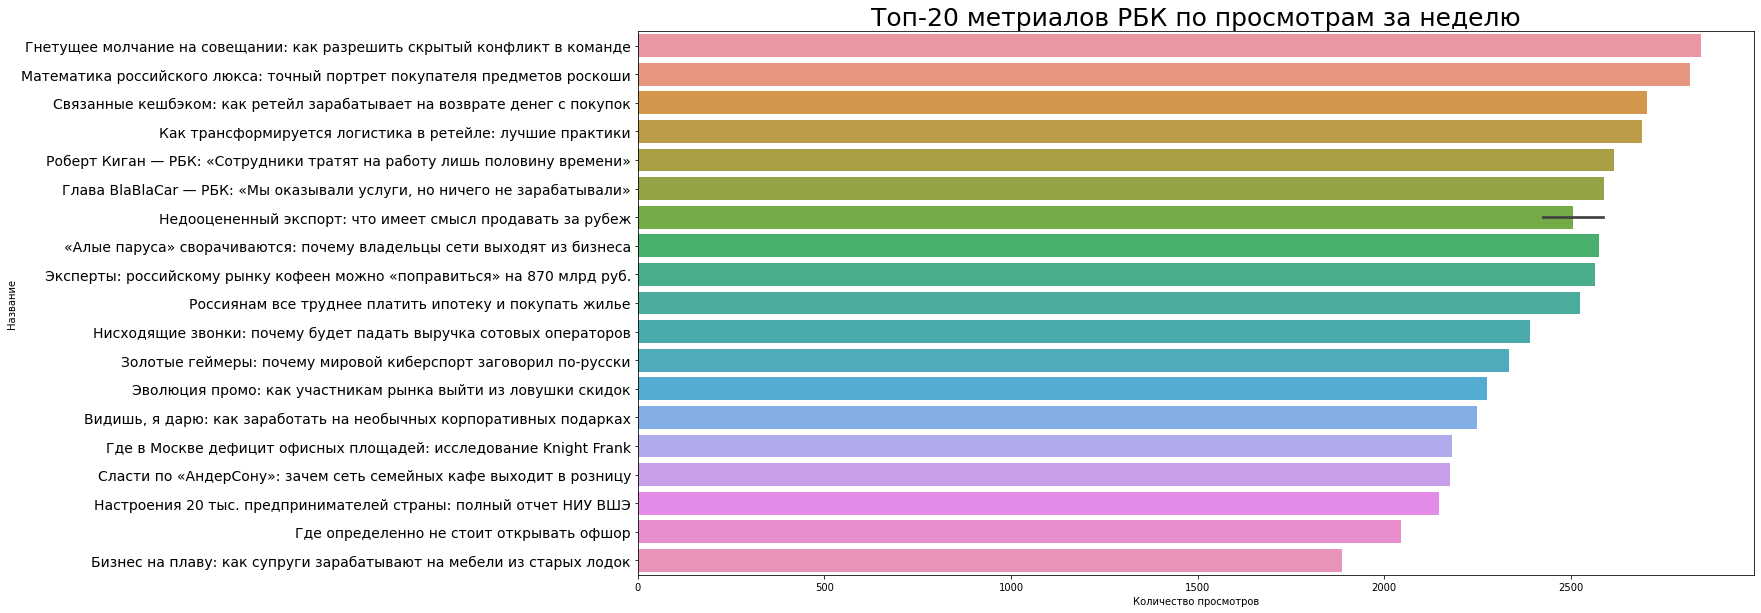

In [18]:
# Строим столбчатый график
plt.figure(figsize=(20,10))
sns.barplot(x='views', y='title', data=top20)

# Добавляем подписи
plt.title('Топ-20 метриалов РБК по просмотрам за неделю', fontsize=25)
plt.xlabel('Количество просмотров')
plt.ylabel('Название')
plt.yticks(fontsize=14)

# Выводим график
plt.show()

In [19]:
# Добавим ссылки в таблицу
top20['title'] = top20['url'].map('<a href="{}">'.format) + top20['title'] + "</a>"

In [20]:
from IPython.display import HTML
HTML(top20.to_html(escape=False))

,id_post,title,url,views
0,5c4af9ed9a7947bd94fe0cc9,Гнетущее молчание на совещании: как разрешить скрытый конфликт в команде,https://pro.rbc.ru/news/5c4af9ed9a7947bd94fe0cc9,2849
1,5c6195799a79478b57ba6cf3,Математика российского люкса: точный портрет покупателя предметов роскоши,https://pro.rbc.ru/news/5c6195799a79478b57ba6cf3,2819
2,5c46d39b9a7947fc20fbcce6,Связанные кешбэком: как ретейл зарабатывает на возврате денег с покупок,https://pro.rbc.ru/news/5c46d39b9a7947fc20fbcce6,2704
3,5c60c9fd9a794747ed04cfe2,Как трансформируется логистика в ретейле: лучшие практики,https://pro.rbc.ru/news/5c60c9fd9a794747ed04cfe2,2691
4,5c5436a39a79472d6c58bca8,Роберт Киган — РБК: «Сотрудники тратят на работу лишь половину времени»,https://pro.rbc.ru/news/5c5436a39a79472d6c58bca8,2615
5,5c658e479a79474d32847233,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, но ничего не зарабатывали»",https://pro.rbc.ru/news/5c658e479a79474d32847233,2589
6,5c503adb9a794784a693903b,Недооцененный экспорт: что имеет смысл продавать за рубеж,https://pro.rbc.ru/news/5c503adb9a794784a693903b,2588
7,5c65950d9a79474f82f780d7,«Алые паруса» сворачиваются: почему владельцы сети выходят из бизнеса,https://pro.rbc.ru/news/5c65950d9a79474f82f780d7,2577
8,5c627bba9a7947cb36ac9898,Эксперты: российскому рынку кофеен можно «поправиться» на 870 млрд руб.,https://pro.rbc.ru/news/5c627bba9a7947cb36ac9898,2566
9,5c6400fa9a79474974a37aab,Россиянам все труднее платить ипотеку и покупать жилье,https://pro.rbc.ru/news/5c6400fa9a79474974a37aab,2524
